<a href="https://colab.research.google.com/github/GustaFTW/TensorFlow-ZTM/blob/main/exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 4

## Loading in some helper functions

In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img


# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor 
    and reshapes it to (img_shape, img_shape, colour_channels).
    """
    
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image(get all values between 0 and 1)
    img = img/255.
    return img


# Plot the validation and training curves separately
def plot_loss_curves(history):    
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"])) # how many epochs we ran through

    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()


class_names = ["pizza", "steak"]
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

import tensorflow_hub as hub
from tensorflow.keras import layers


# Let's make a create_model() function to create a model from a URL
def create_model(model_url, num_classes=10):
    """
    Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

    Args:
      model_url (str): A TensorFlow Hub feature extraction URL.
      num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes, default10.
    
    Return:
      An uncompiled Keras Sequential model with model_url as feature extractor 
      layer and Dense output layer With num_classes output neurons.
    """
    IMG_SHAPE=(224, 224)
    # Download the pretrained model and save it as a Keras layer
    feature_extraction_layer = hub.KerasLayer(model_url, 
                                              trainable=False, # freeze the already learned patterns
                                              name="feature_extraction_layer",
                                              input_shape=IMG_SHAPE+(3,))
    
    # Create our own model
    if num_classes == 1:
        model = tf.keras.Sequential([
            feature_extraction_layer,
            layers.Dense(num_classes, activation="sigmoid", name="output_layer")
        ])
        print("Model created using Sigmoid activation on the last layer")
    else:
        model = tf.keras.Sequential([
              feature_extraction_layer,
              layers.Dense(num_classes, activation="softmax", name="output_layer")
          ])
        print("Model created using Softmax activation on the last layer")
    return model

## Exercise 1
> Lontra Fura model using a preloaded model

In [ ]:
# First, load the data
import zipfile

# Unzip the uploaded file
zip_ref = zipfile.ZipFile("lontra_fura.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Start preparing our data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory("lontra_fura/train",
                                               batch_size=2,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=69)
test_data = test_datagen.flow_from_directory("lontra_fura/test",
                                             batch_size=2,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             seed=69)

Found 26 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [ ]:
# Load the model
model_furontras = create_model("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/5", 1)

# Compile the model
model_furontras.compile(loss="BinaryCrossentropy",
                       optimizer="Adam",
                       metrics=["Accuracy"])

Model created using Sigmoid activation on the last layer


In [ ]:
# model_2 = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(10, 3, activation="relu"),
#     tf.keras.layers.Conv2D(10, 3, activation="relu"),
#     tf.keras.layers.Conv2D(10, 3, activation="relu"),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# model_2.compile(loss="BinaryCrossentropy",
#                        optimizer="Adam",
#                        metrics=["Accuracy"])

In [ ]:
# # Fit the model to our data
# history_2 = model_2.fit(train_data,
#                               epochs=10,
#                               steps_per_epoch=len(train_data),
#                               validation_data=test_data,
#                               validation_steps=len(test_data))

In [ ]:
# Fit the model to our data
history = model_furontras.fit(train_data,
                              epochs=10,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=len(test_data))

Epoch 1/10
13/13 [==============================] - 4s 87ms/step - loss: 0.6639 - Accuracy: 0.6923 - val_loss: 0.3930 - val_Accuracy: 0.8333
Epoch 2/10
13/13 [==============================] - 1s 40ms/step - loss: 0.1225 - Accuracy: 1.0000 - val_loss: 0.1742 - val_Accuracy: 1.0000
Epoch 3/10
13/13 [==============================] - 1s 42ms/step - loss: 0.0401 - Accuracy: 1.0000 - val_loss: 0.0725 - val_Accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 1s 45ms/step - loss: 0.0205 - Accuracy: 1.0000 - val_loss: 0.0485 - val_Accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 1s 43ms/step - loss: 0.0148 - Accuracy: 1.0000 - val_loss: 0.0392 - val_Accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 1s 42ms/step - loss: 0.0118 - Accuracy: 1.0000 - val_loss: 0.0333 - val_Accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 1s 40ms/step - loss: 0.0102 - Accuracy: 1.0000 - val_loss: 0.0287 - val_Accuracy: 1.0000
Epoch 8/10
13

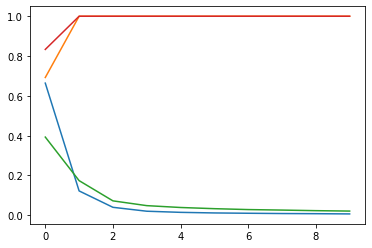

In [ ]:
import pandas as pd
plt.plot(pd.DataFrame(history.history))

1/1 [==============================] - 0s 20ms/step


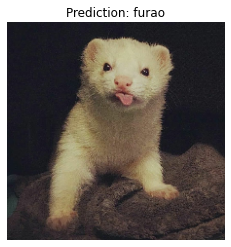

In [ ]:
pred_and_plot(model_furontras, "t2.jpg", ["furao", "lontra"])

1/1 [==============================] - 0s 35ms/step


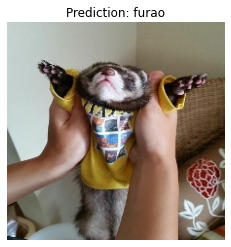

In [ ]:
pred_and_plot(model_furontras, "t6.jpg", ["furao", "lontra"])

## Exercise 2
> Build and fit a model using the same data we have here (*10_food_classes_10_percent*) but with the MobileNetV2 architecture feature extraction (*mobilenet_v2_100_224/feature_vector*) from TensorFlow Hub, how does it perform compared to our other models?

In [ ]:
# First get the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2022-12-13 22:23:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   149MB/s    in 1.1s    

2022-12-13 22:23:16 (149 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Now, prepare our data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
train_data = train_datagen.flow_from_directory("10_food_classes_10_percent/train/",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory("10_food_classes_10_percent/test/",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Load the model
model = create_model("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5", 10)

Model created using Softmax activation on the last layer


In [ ]:
# Compile the model
model.compile(loss="CategoricalCrossentropy",
              optimizer="Adam",
              metrics=["Accuracy"])

In [ ]:
# Fit the model
model.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=len(test_data))

Epoch 1/5
24/24 [==============================] - 18s 772ms/step - loss: 1.9064 - Accuracy: 0.3440 - val_loss: 1.3672 - val_Accuracy: 0.5620
Epoch 2/5
24/24 [==============================] - 15s 661ms/step - loss: 1.0593 - Accuracy: 0.6920 - val_loss: 0.9184 - val_Accuracy: 0.7252
Epoch 3/5
24/24 [==============================] - 15s 627ms/step - loss: 0.7370 - Accuracy: 0.7973 - val_loss: 0.7618 - val_Accuracy: 0.7728
Epoch 4/5
24/24 [==============================] - 15s 630ms/step - loss: 0.5834 - Accuracy: 0.8427 - val_loss: 0.7005 - val_Accuracy: 0.7840
Epoch 5/5
24/24 [==============================] - 15s 630ms/step - loss: 0.4898 - Accuracy: 0.8787 - val_loss: 0.6620 - val_Accuracy: 0.7868


# Section 5


## Exercise 1
> Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.

In [ ]:
# Get the helper functions file
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import the functions
from helper_functions import unzip_data, plot_loss_curves, create_tensorboard_callback, compare_historys

--2023-01-09 21:12:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-09 21:12:15 (105 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Get the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the data
unzip_data("10_food_classes_10_percent.zip")

--2023-01-09 21:12:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  23.0MB/s    in 8.1s    

2023-01-09 21:12:30 (19.9 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import tensorflow as tf
# Preparing the data
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_dir = "/content/10_food_classes_10_percent/train/"
test_dir = "/content/10_food_classes_10_percent/test/"
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 750 files belonging to 10 classes.


In [ ]:
# Create a checkpoint for saving the weights
checkpoint_path = "section_5/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

In [ ]:
# Build the model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="CategoricalCrossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback("section_5/section_5_tensorboard", "model_1_base_model_10_epochs"), checkpoint_callback])

16705208/16705208 [==============================] - 2s 0us/step
Saving TensorBoard log files to: section_5/section_5_tensorboard/model_1_base_model_10_epochs/20230109-211250
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.9068 - accuracy: 0.4160
Epoch 1: val_loss improved from inf to 1.31810, saving model to section_5/checkpoint.ckpt
24/24 [==============================] - 18s 201ms/step - loss: 1.9068 - accuracy: 0.4160 - val_loss: 1.3181 - val_accuracy: 0.7500
Epoch 2/10
23/24 [===========================>..] - ETA: 0s - loss: 1.0983 - accuracy: 0.7840
Epoch 2: val_loss improved from 1.31810 to 0.87274, saving model to section_5/checkpoint.ckpt
24/24 [==============================] - 5s 177ms/step - loss: 1.0994 - accuracy: 0.7827 - val_loss: 0.8727 - val_accuracy: 0.8229
Epoch 3/10
23/24 [===========================>..] - ETA: 0s - loss: 0.7964 - accuracy: 0.8342
Epoch 3: val_loss improved from 0.87274 to 0.73319, saving model to section_5/checkpoint.ckpt
24

In [ ]:
# Evaluate our model
model_1.evaluate(test_data)

24/24 [==============================] - 2s 77ms/step - loss: 0.2685 - accuracy: 0.9560


[0.2684972882270813, 0.9559999704360962]

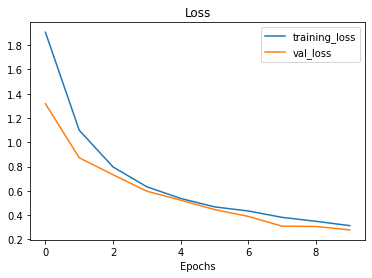

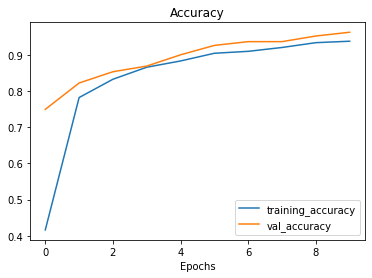

In [ ]:
# Check the loss curves
plot_loss_curves(history_1)

## Exercises 2
> Fine-tune the last 20 layers of the base model you trained in 1 for another 10 epochs. How did it go? 

In [ ]:
# Check the layers
for i, layers in enumerate(model_1.layers[1].layers):
  print(f"{i} {layers.name} {layers.trainable}")

In [ ]:
# Change the layers trainable settings to true, so we can assign them to model_1
base_model.trainable = True 
# This will set everything back to False, except the last 10 layers (which is the ones we want to be able to train again)
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Recompile (we have to recompile our models every time we make a change)
model_1.compile(loss="CategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001), # when fine-tuning you typically want to lower the learning rate to 10x
                metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Check the layers again
for i, layers in enumerate(model_1.layers[1].layers):
  print(f"{i} {layers.name} {layers.trainable}")

In [ ]:
# Now we fine-tune it
history_2 = model_1.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        initial_epoch=history_1.epoch[-1],
                        callbacks=[create_tensorboard_callback("section_5/section_5_tensorboard", "model_2_last_20_layers_fine_tuned"), checkpoint_callback],)

Saving TensorBoard log files to: section_5/section_5_tensorboard/model_2_last_20_layers_fine_tuned/20230109-211518
Epoch 10/20
24/24 [==============================] - ETA: 0s - loss: 0.7679 - accuracy: 0.8147
Epoch 10: val_loss improved from 0.27860 to 0.24852, saving model to section_5/checkpoint.ckpt
24/24 [==============================] - 17s 211ms/step - loss: 0.7679 - accuracy: 0.8147 - val_loss: 0.2485 - val_accuracy: 0.9479
Epoch 11/20
23/24 [===========================>..] - ETA: 0s - loss: 0.4898 - accuracy: 0.9198
Epoch 11: val_loss improved from 0.24852 to 0.19953, saving model to section_5/checkpoint.ckpt
24/24 [==============================] - 4s 148ms/step - loss: 0.4863 - accuracy: 0.9213 - val_loss: 0.1995 - val_accuracy: 0.9583
Epoch 12/20
23/24 [===========================>..] - ETA: 0s - loss: 0.3715 - accuracy: 0.9416
Epoch 12: val_loss improved from 0.19953 to 0.15250, saving model to section_5/checkpoint.ckpt
24/24 [==============================] - 4s 135ms/st

24/24 [==============================] - 2s 77ms/step - loss: 0.0321 - accuracy: 0.9987


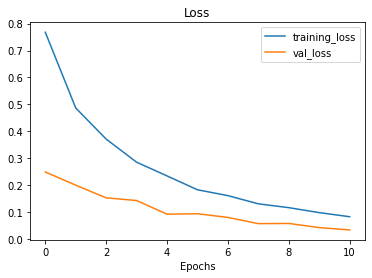

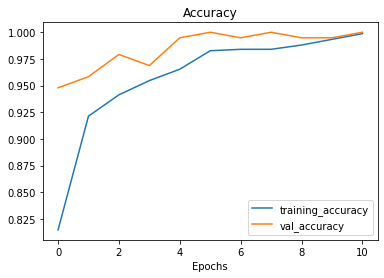

In [ ]:
# Evaluate the model
model_1.evaluate(test_data)
plot_loss_curves(history_2)

## Exercise 3:
> Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?


In [ ]:
# Check the layers of our model
for i, layer in enumerate(model_1.layers[1].layers):
  print(i, layer.name, layer.trainable)

In [ ]:
# Change all layers of our model to be trainable, so that we can freeze the last 30 layers
base_model.trainable = True
for layer in base_model.layers[:-30]:
  layer.trainable = False

for i, layer in enumerate(model_1.layers[1].layers):
  print(i, layer.name, layer.trainable)

In [ ]:
# Now that we checked, we recompile our model
model_1.compile(loss="CategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.00001), # We might lower even more our lr
                metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Now we fit the model
history_3 = model_1.fit(train_data,
                        epochs=30,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        initial_epoch=history_2.epoch[-1],
                        callbacks=[create_tensorboard_callback("section_5/section_5_tensorboard", "model_3_last_30_layers_fine_tuned"), checkpoint_callback])

In [ ]:
# Evaluate our model
model_1.evaluate(test_data)

24/24 [==============================] - 3s 81ms/step - loss: 0.0241 - accuracy: 1.0000


[0.02410043030977249, 1.0]

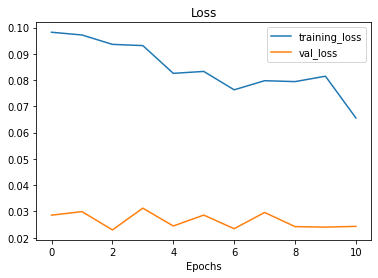

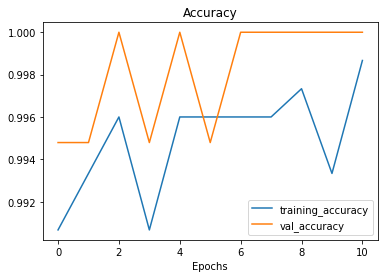

In [ ]:
plot_loss_curves(history_3)

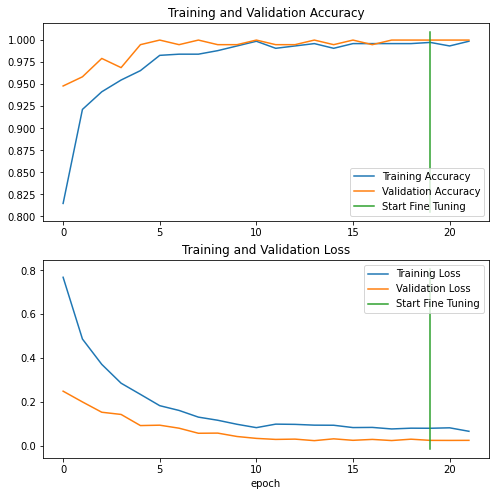

In [ ]:
compare_historys(history_2, history_3, 20)

In [ ]:
!tensorboard dev upload --logdir ./section_5/section_5_tensorboard \
  --name "Section 5 Exercises" \
  --description "A series of 3 models from the section 5 exercises." \
  --one_shot # exits the uploader once its finished uploading


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./section_5/section_5_tensorboard

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=BYuHc5YQ7h5AZwBDTQ7SAztjwk09r2&prompt=consent

## Exercise 4
> Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

In [ ]:
!wget https://cdn.minhareceita.com.br/2020/08/hamburguer-angus-fatias-redondas-bacon-mobile.jpg

In [ ]:
# Creating a function that would grab the image from a dataset, visualize and gives the prediction of it. 
import numpy as np
def dataset_visualizer(dataset , model):
  image_batch, label_batch = dataset.as_numpy_iterator().next()
  batch_prob = [model.predict(tf.expand_dims(img, axis=0)) for img in image_batch]
  batch_preds = [class_names[np.argmax(prob)] for prob in batch_prob]
  plt.figure(figsize= (10 , 10))
  
  for i in range(4):
    ax = plt.subplot(2 , 2 , i + 1)
    if class_names[np.argmax(label_batch[i])] == batch_preds[i]:
      title_color = 'g'
    else:
      title_color = 'r'
    plt.imshow(image_batch[i].astype('uint8'))
    plt.title(f"actual: {class_names[np.argmax(label_batch[i])]}, pred: {batch_preds[i]}, prob: {batch_prob[i].max():.2f}" , c = title_color)
    plt.axis('off')

1/1 [==============================] - 0s 24ms/step


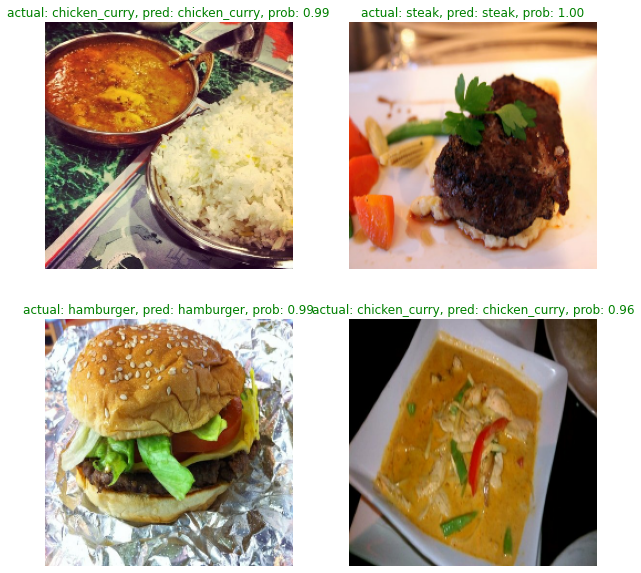

In [ ]:
dataset_visualizer(test_data, model_1)

# Section 6

## Exercise 2

> Train a feature-extraction transfer learning model for 10 epochs on the same data and compare its performance versus a model which used feature extraction for 5 epochs and fine-tuning for 5 epochs (like we've used in this notebook). Which method is better?

In [ ]:
# First, loading in the helper functions file
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, plot_loss_curves, create_tensorboard_callback, compare_historys

In [ ]:
# Getting the data
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                    label_mode="categorical",
                                                    image_size=(224, 224))
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=(224, 224))
class_names = train_data.class_names

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
import tensorflow as tf

# Create the model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="CategoricalCrossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=int(0.20 * len(test_data)))

Epoch 1/10
237/237 [==============================] - 43s 154ms/step - loss: 3.1267 - accuracy: 0.3284 - val_loss: 2.0988 - val_accuracy: 0.5390
Epoch 2/10
237/237 [==============================] - 35s 145ms/step - loss: 1.8420 - accuracy: 0.5868 - val_loss: 1.6916 - val_accuracy: 0.5995
Epoch 3/10
237/237 [==============================] - 36s 148ms/step - loss: 1.4364 - accuracy: 0.6698 - val_loss: 1.5357 - val_accuracy: 0.6224
Epoch 4/10
237/237 [==============================] - 38s 156ms/step - loss: 1.2047 - accuracy: 0.7232 - val_loss: 1.4592 - val_accuracy: 0.6309
Epoch 5/10
237/237 [==============================] - 41s 170ms/step - loss: 1.0383 - accuracy: 0.7657 - val_loss: 1.4184 - val_accuracy: 0.6375
Epoch 6/10
237/237 [==============================] - 34s 141ms/step - loss: 0.9067 - accuracy: 0.8003 - val_loss: 1.3917 - val_accuracy: 0.6392
Epoch 7/10
237/237 [==============================] - 45s 187ms/step - loss: 0.7946 - accuracy: 0.8308 - val_loss: 1.3789 - val_ac

In [ ]:
# Now for the fine-tuned model
inputs = tf.keras.layers.Input((224, 224, 3), name="input_layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile our second model
model_2.compile(loss="CategoricalCrossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the second model
initial_epochs = 5
history_2 = model_2.fit(train_data,
            epochs=initial_epochs,
            validation_data=test_data,
            validation_steps=int(0.20 * len(test_data)))

Epoch 1/5
237/237 [==============================] - 49s 184ms/step - loss: 1.8442 - accuracy: 0.5758 - val_loss: 1.6534 - val_accuracy: 0.5969
Epoch 2/5
237/237 [==============================] - 43s 177ms/step - loss: 1.3985 - accuracy: 0.6755 - val_loss: 1.5163 - val_accuracy: 0.6171
Epoch 3/5
237/237 [==============================] - 29s 123ms/step - loss: 1.1780 - accuracy: 0.7306 - val_loss: 1.4476 - val_accuracy: 0.6319
Epoch 4/5
237/237 [==============================] - 33s 139ms/step - loss: 1.0067 - accuracy: 0.7750 - val_loss: 1.4157 - val_accuracy: 0.6363
Epoch 5/5
237/237 [==============================] - 30s 127ms/step - loss: 0.8767 - accuracy: 0.8053 - val_loss: 1.3924 - val_accuracy: 0.6406


In [ ]:
# Fine tune our model
base_model.trainable = True
for layer in base_model.layers[:-20]: # this will set everything back to false, except (due to the ":" before the -20) the last 20 layers
    layer.trainable = False

# Recompile the model
model_2.compile(loss="CategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

# Refit the model
history_3 = model_2.fit(train_data,
                        epochs=initial_epochs+5,
                        validation_data=test_data,
                        validation_steps=int(0.20 * len(test_data)),
                        initial_epoch=history_2.epoch[-1])

Epoch 5/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


237/237 [==============================] - 38s 136ms/step - loss: 1.1957 - accuracy: 0.7420 - val_loss: 1.3927 - val_accuracy: 0.6367
Epoch 6/10
237/237 [==============================] - 30s 126ms/step - loss: 0.7884 - accuracy: 0.8267 - val_loss: 1.3358 - val_accuracy: 0.6519
Epoch 7/10
237/237 [==============================] - 30s 127ms/step - loss: 0.6512 - accuracy: 0.8623 - val_loss: 1.3016 - val_accuracy: 0.6590
Epoch 8/10
237/237 [==============================] - 30s 126ms/step - loss: 0.5503 - accuracy: 0.8898 - val_loss: 1.2807 - val_accuracy: 0.6642
Epoch 9/10
237/237 [==============================] - 30s 127ms/step - loss: 0.4642 - accuracy: 0.9112 - val_loss: 1.2702 - val_accuracy: 0.6691
Epoch 10/10
237/237 [==============================] - 31s 127ms/step - loss: 0.3957 - accuracy: 0.9316 - val_loss: 1.2722 - val_accuracy: 0.6705


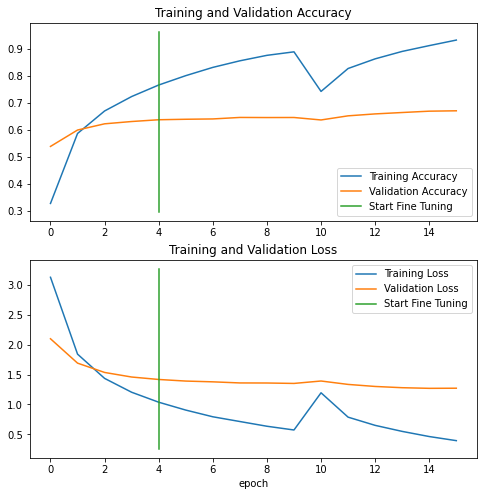

In [ ]:
# As checked in the cell below, both of the models overfitted on the data (with model with fine-tuning having a 3% increase on precision, as expected)
compare_historys(history_1, history_3, 5)

## Exercise 3

> Recreate the first model (the feature extraction model) with mixed_precision turned on.
* Does it make the model train faster? - Yes, it decreased the fitting time by 21%
* Does it effect the accuracy or performance of our model? - Yes, it also reduced the accuracy of our model by nearly 1%
* What's the advantages of using mixed_precision training? - The trade-off of loosing accuracy for a faster fitting time seems good, by evaluating our data (21% in time for only 1% decrease in accuracy), but with a larger number of epochs the lower accuracy may become a problem.

In [ ]:
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

In [ ]:
# Now we recompile and refit the model
model_2.compile(loss="CategoricalCrossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Refit
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=int(0.20 * len(test_data)))

Epoch 1/5
237/237 [==============================] - 38s 134ms/step - loss: 0.7184 - accuracy: 0.8026 - val_loss: 1.5994 - val_accuracy: 0.6169
Epoch 2/5
237/237 [==============================] - 34s 140ms/step - loss: 0.2920 - accuracy: 0.9350 - val_loss: 1.5727 - val_accuracy: 0.6274
Epoch 3/5
237/237 [==============================] - 32s 131ms/step - loss: 0.1438 - accuracy: 0.9741 - val_loss: 1.5797 - val_accuracy: 0.6345
Epoch 4/5
237/237 [==============================] - 31s 128ms/step - loss: 0.1083 - accuracy: 0.9782 - val_loss: 1.6147 - val_accuracy: 0.6339
Epoch 5/5
237/237 [==============================] - 40s 165ms/step - loss: 0.0908 - accuracy: 0.9827 - val_loss: 1.6571 - val_accuracy: 0.6311
